# Machine Learning Tutorial: Regression in R

This notebook walks through a regression task using the **Iris** dataset.

## Step 1: Install and Load Packages

This code loads all the R packages needed for the regression tutorial:

* **`tidyverse`**: A collection of packages for data manipulation and visualization (e.g., `dplyr`, `ggplot2`).
* **`caret`**: Provides tools for training and evaluating machine learning models.
* **`randomForest`**: Implements the Random Forest algorithm for regression or classification.
* **`ggplot2`**: Used for creating informative and elegant data visualizations.
* **`Metrics`**: Offers performance evaluation metrics like RMSE and MAE.
* **`MASS`**: Contains datasets and functions for statistical modeling (used here for the `Boston` dataset).
* **`corrplot`**: Used to visualize correlations between features using correlation matrices.

The commented `install.packages()` line reminds users to install these packages first if they are not already installed.


In [ ]:
# Install if needed:
install.packages(c("tidyverse", "caret", "randomForest", "ggplot2", "Metrics", "corrplot"))

library(tidyverse)
library(caret)
library(randomForest)
library(ggplot2)
library(Metrics)
library(MASS)
library(corrplot)

## Step 2: Load the Dataset

We begin by loading the built-in **Iris** dataset into a variable called `df`. This dataset is widely used in machine learning tutorials and contains 150 samples of iris flowers across three species (*setosa*, *versicolor*, and *virginica*). Each sample includes four numerical features: sepal length, sepal width, petal length, and petal width.

To get an initial look at the data, we use two functions:

* **`head(df)`**: Displays the first six rows of the dataset, allowing us to quickly check the format and feature values.
* **`tail(df, n = 10)`**: Shows the last ten rows of the dataset, helping us spot any unusual entries or patterns at the end of the data frame.

These preview functions are useful for gaining a quick understanding of the dataset before diving into data exploration or modeling.


In [2]:
df <- iris
# Display the first 6 rows of a data frame df
head(df)

# Display the last 10 rows of df
tail(df, n = 10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
141,6.7,3.1,5.6,2.4,virginica
142,6.9,3.1,5.1,2.3,virginica
143,5.8,2.7,5.1,1.9,virginica
144,6.8,3.2,5.9,2.3,virginica
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


## Step 3: Data Cleaning (checking for missing data)

Before proceeding with data preprocessing or model training, it’s important to understand the quality and distribution of the dataset. In this step, we perform two key checks:

* **Missing Values**:
  Using `sum(is.na(df))`, we check for any missing (`NA`) values in the dataset. Although the Iris dataset is clean by default, verifying the absence of missing data is a good habit in any machine learning pipeline.

* **Summary Statistics**:
  The `summary(df)` function provides descriptive statistics for each column in the dataset. For numerical variables, it displays metrics such as **minimum**, **1st quartile**, **median**, **mean**, **3rd quartile**, and **maximum** values. For categorical variables (like species), it shows the number of occurrences for each category.

These checks help ensure data quality and give you a clearer picture of how features are distributed before scaling or modeling.


In [3]:
print("The number of missing values in the data:")
sum(is.na(df)) # count of missing values

print("summary statistics of the data")
summary(df)

[1] "The number of missing values in the data:"


[1] 0

[1] "summary statistics of the data"


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

## Step 4: Exploratory Data Analysis (EDA)

Before training any machine learning model, it's valuable to visualize the distribution of key features and explore relationships between them. This step provides two important visualizations:

### 1. Distribution Plot of a Key Feature

We begin by visualizing the distribution of **`Petal.Length`**, one of the most informative features in the Iris dataset. Using `ggplot2`, a histogram is plotted to show how frequently each petal length value occurs:

This histogram helps identify the shape of the distribution (e.g., skewed, normal, multimodal), and whether there are outliers or distinct clusters that could impact model performance.

### 2. Correlation Heatmap of Numerical Features

Next, we compute and visualize the **correlation matrix** for all numerical features in the dataset (excluding the categorical `Species` column). The correlation matrix shows how strongly each pair of numerical features is linearly related.

* **`cor()`**: Calculates pairwise Pearson correlation coefficients.
* **`corrplot()`**: Produces a color-coded heatmap where stronger correlations appear as more vivid colors.

  * Values near 1 indicate strong positive correlation.
  * Values near -1 indicate strong negative correlation.
  * Values near 0 indicate little to no correlation.

Understanding these relationships helps identify redundant features and supports feature selection or dimensionality reduction if needed.


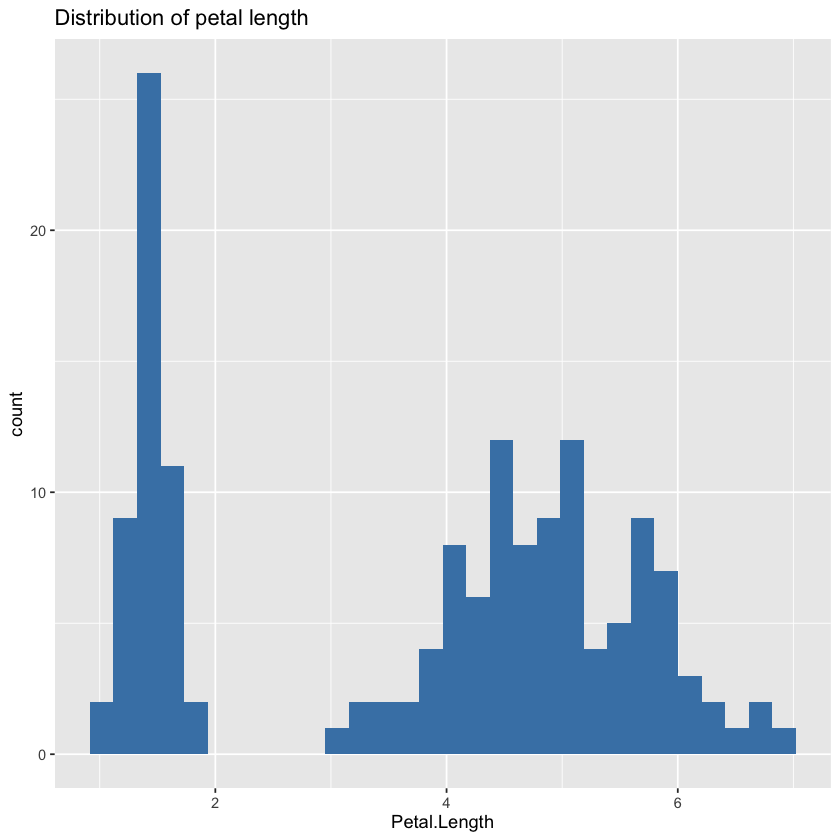

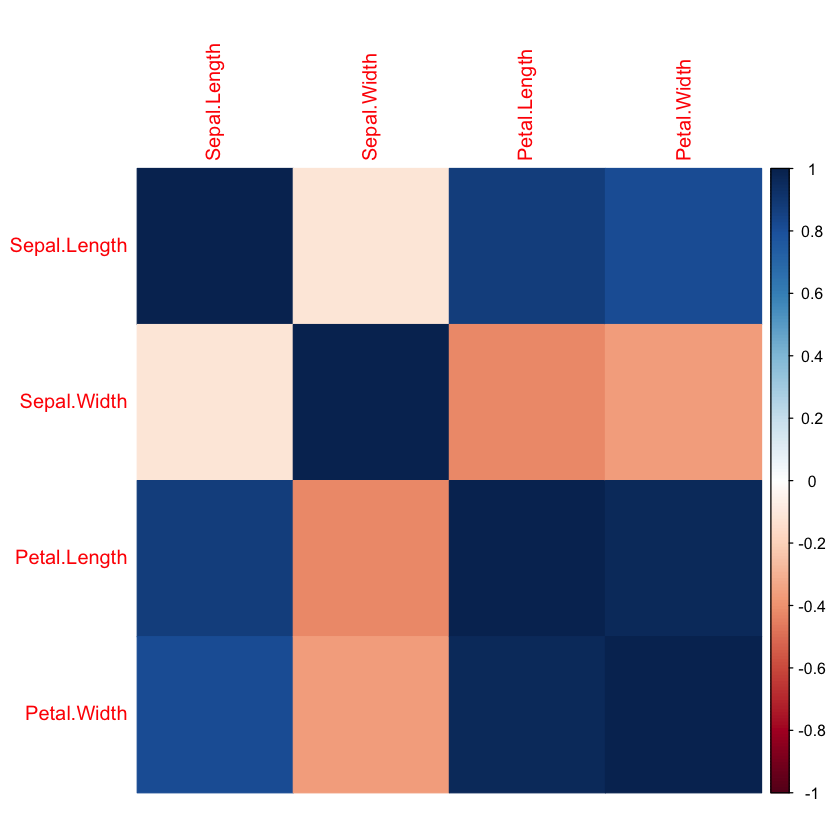

In [4]:
# Distribution of target
ggplot(df, aes(x = Petal.Length)) +
  geom_histogram(fill = "steelblue", bins = 30) +
  labs(title = "Distribution of petal length", x = "Petal.Length")

# Correlation heatmap between all numerical columns (except Species)
cor_matrix <- cor(subset(df, select = -Species))
  # Removes the first column
corrplot(cor_matrix, method = "color")

We see that the highest correlation is between Petal.Width and Petal.Length and also between Sepal.Length and Petal.Length. 

## Step 5: Split the Data

To evaluate the performance of a machine learning model, it’s essential to divide the dataset into two parts:

* **Training set**: Used to train the model.
* **Testing set**: Used to evaluate how well the model generalizes to unseen data.

In this step, we perform an 80/20 split using the `createDataPartition()` function from the **caret** package. This function ensures that the distribution of the target variable is preserved in both subsets (also known as *stratified sampling*).

* **`set.seed(123)`** ensures that the data split is reproducible.
* **`createDataPartition()`** randomly selects 80% of the data for training (`p = 0.8`), while preserving the distribution of the target variable (`Petal.Length` in this case).
* The remaining 20% becomes the **testing set**.

This prepares the data for model training and evaluation in a way that helps prevent overfitting and ensures more reliable performance metrics.


In [5]:
set.seed(123)
split <- createDataPartition(df$Petal.Length, p = 0.8, list = FALSE)
train <- df[split, ]
test <- df[-split, ]

## Step 6: Preprocessing (Centering & Scaling)

Before training many machine learning models—especially those that are distance-based or sensitive to feature magnitude—it’s important to **standardize** the input features. In this step, we apply **feature scaling** to ensure that all numerical variables contribute equally to the model.

We use the `preProcess()` function from the **caret** package to scale the data:

* **`preProcess()`** creates a preprocessing model that centers (subtracts the mean) and scales (divides by standard deviation) each numeric column.
* This ensures each feature has a **mean of 0** and a **standard deviation of 1**, standardizing their ranges.
* **`predict()`** then applies that preprocessing model to both the training and test sets.

This step helps improve model stability and training efficiency, particularly for algorithms sensitive to scale.



In [7]:
pre_proc <- preProcess(train, method = c("center", "scale"))
train_scaled <- predict(pre_proc, train)
test_scaled <- predict(pre_proc, test)

#### Step 7: Train Regression Models 

For example, [Logistical Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) and [Random Forest Regression](https://scikit-learn.org/stable/modules/ensemble.html#). Other regression models like [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html), [Gradient Boosting](https://scikit-learn.org/stable/modules/ensemble.html#), [Decision Tree](https://scikit-learn.org/stable/modules/tree.html) can be used too.

### Linear Regression

With the features scaled and the data split, we’re now ready to train our machine learning model. In this step, we build a **linear regression model** to predict `Petal.Length` using all other features in the dataset.

* **`lm()`** fits a **linear regression model** where the target variable is `Petal.Length`, and the predictors are all other columns in the data (indicated by the formula `~ .`).
* **`train_scaled`** is used so the model benefits from normalized feature values.
* **`summary(model_lm)`** displays the model’s coefficients, R-squared value, residual statistics, and significance levels (p-values) for each predictor.

**What does the output tell us?**

* The **coefficients** show how each feature affects `Petal.Length`.
* The **R-squared value** indicates how much of the variance in `Petal.Length` is explained by the model.
* Low **p-values** (< 0.05) suggest statistically significant predictors.

This baseline model gives us an interpretable starting point to evaluate regression performance and feature importance.


In [8]:
model_lm <- lm(Petal.Length ~ ., data = train_scaled)
summary(model_lm)


Call:
lm(formula = Petal.Length ~ ., data = train_scaled)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42093 -0.09442  0.00209  0.08944  0.34538 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.67534    0.08585  -7.867 2.10e-12 ***
Sepal.Length       0.29376    0.02633  11.158  < 2e-16 ***
Sepal.Width       -0.05599    0.02242  -2.498 0.013906 *  
Petal.Width        0.22670    0.05646   4.016 0.000106 ***
Speciesversicolor  0.87303    0.10685   8.171 4.28e-13 ***
Speciesvirginica   1.15782    0.15100   7.668 5.90e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1504 on 116 degrees of freedom
Multiple R-squared:  0.9783,	Adjusted R-squared:  0.9774 
F-statistic:  1047 on 5 and 116 DF,  p-value: < 2.2e-16


### Random Forest 

To improve predictive performance beyond a simple linear model, we now train a **Random Forest regression model**. Random Forest is an **ensemble learning algorithm** that builds multiple decision trees and averages their results to make more accurate and robust predictions.

* **`randomForest()`** fits a regression model that predicts `Petal.Length` using all other features (`~ .`).
* **`ntree = 100`** specifies the number of decision trees to grow in the forest. More trees can improve accuracy, but also increase training time.
* **`set.seed(42)`** ensures reproducibility so you get the same results each time.
* The final line prints the trained model object, which includes performance statistics like **% variance explained** and **Mean Squared Residuals**.

**Why use Random Forest?**
It handles non-linear relationships, is less sensitive to outliers, and typically yields higher accuracy than linear models—making it a strong choice for real-world regression tasks.

This model will be evaluated and compared with the linear model in the next step.


In [9]:
set.seed(42)
model_rf <- randomForest(Petal.Length ~ ., data = train_scaled, ntree = 100)
model_rf


Call:
 randomForest(formula = Petal.Length ~ ., data = train_scaled,      ntree = 100) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 1

          Mean of squared residuals: 0.02834505
                    % Var explained: 97.14

## Step 8: Evaluate the two models using metrics like R-square, Mean Absolute Error (MAE), and Mean Square Error (MSE)

Now that we have trained both a **Linear Regression** and a **Random Forest** model, this step focuses on using these models to predict petal lengths on the test data and evaluate their accuracy using common regression metrics.

* **R² (Coefficient of Determination)**: Measures the proportion of variance in the target variable explained by the model. Values closer to 1 indicate better fit.
* **MAE (Mean Absolute Error)**: Average absolute difference between predicted and actual values. Lower values mean better predictive accuracy.
* **MSE (Mean Squared Error)**: Average squared difference between predicted and actual values, penalizing larger errors more heavily.

**What this does:**

* Predicts `Petal.Length` for the test set using both models.
* Compares predictions to actual values using the metrics above.
* Prints the metrics so you can compare which model performs better.

**Interpreting results**:
Look for higher R² and lower MAE/MSE to identify the better model. Random Forest often outperforms linear regression on complex data due to its ability to capture non-linear patterns.



In [10]:
# Predictions
pred_lm <- predict(model_lm, newdata = test_scaled)
pred_rf <- predict(model_rf, newdata = test_scaled)
actual <- test_scaled$Petal.Length

# Metrics
lm_r2 <- R2(pred_lm, actual)
rf_r2 <- R2(pred_rf, actual)

lm_mae <- mae(actual, pred_lm)
rf_mae <- mae(actual, pred_rf)

lm_mse <- mse(actual, pred_lm)
rf_mse <- mse(actual, pred_rf)

cat("Linear Regression:\n")
cat("R²:", lm_r2, "\nMAE:", lm_mae, "\nMSE:", lm_mse, "\n\n")

cat("Random Forest:\n")
cat("R²:", rf_r2, "\nMAE:", rf_mae, "\nMSE:", rf_mse)

Linear Regression:
R<U+00B2>: 0.9782547 
MAE: 0.1072505 
MSE: 0.02078893 

Random Forest:
R<U+00B2>: 0.9687633 
MAE: 0.1156793 
MSE: 0.03029699

## Step 9: Save and Load the Model

Once a model is trained and performs well, it’s useful to save it to disk so you can reuse it later without retraining. This step shows how to **save** and **load** your linear regression model in R using the `saveRDS()` and `readRDS()` functions.

* **`saveRDS()`** serializes the model object and writes it to disk as an `.rds` file.
* The saved model can be loaded back into R later with **`readRDS()`**, restoring the exact trained model.
* This workflow is useful for deploying models, sharing with others, or continuing analysis in future sessions without repeating costly training.



In [11]:
# Save the model
saveRDS(model_lm, file = "linear_model.rds")

# Load later
# model <- readRDS("linear_model.rds")